## 广东2022年7月清洁与污染个例
## `GZ_2207 Clean & Pollute`

---
*@author: Evan*\
*@date: 2022-08-31*

In [1]:
import netCDF4 as nc
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import patches

import scipy.io as io

In [2]:
# silence the warning note
import warnings
warnings.filterwarnings("ignore")

In [3]:
# 允许显示中文
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
plt.rcParams['axes.unicode_minus'] = False

## 读取数据

In [4]:
GridFile=nc.Dataset('F:/Data/caseGZ_2207/GRIDCRO2D_2022200.nc')
chemFile=nc.Dataset('F:/Data/caseGZ_2207/COMBINE_ACONC_CN3GD_152X110_202207_mech.nc')
uvFile=nc.Dataset('F:/Data/caseGZ_2207/COMBINE_ACONC_CN3GD_152X110_202207_uv_vertical.nc')

In [47]:
lat=np.squeeze(GridFile.variables['LAT'][:])
lon=np.squeeze(GridFile.variables['LON'][:])
O3_L1=np.squeeze(chemFile.variables['O3'][112:448,0,:,:])*48/22.4
O3_L2=np.squeeze(chemFile.variables['O3'][112:448,18,:,:])*48/22.4

print('lat & lon = ',lat.shape)
print('chem      = ',O3_L1.shape)

lat & lon =  (110, 152)
chem      =  (336, 110, 152)


In [48]:
day0=np.arange(0,336,24)
O3_day=np.empty([14,24])
for i in range(14):
    day=day0[i]
    O3_day[i,:]=np.squeeze(np.mean(np.mean(O3_L1[day:day+24,56:59,71:73],1),1))

O3_day.shape # hourly O3 in 14 days 

(14, 24)

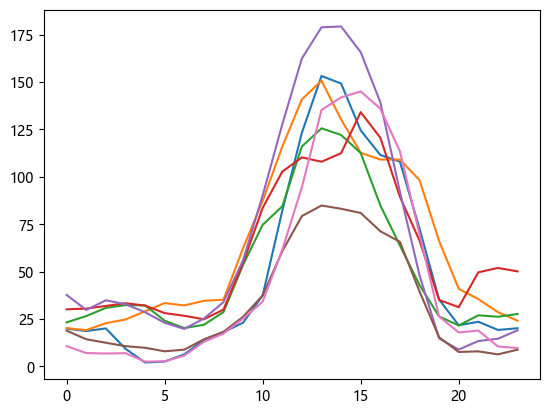

In [49]:
fig = plt.figure()
ax=fig.subplots(1)
t=np.arange(0,24)
for i in range(7):
    ax.plot(t,O3_day[i,:])
plt.show()

In [50]:
# calculate MDA8 from sim
O3_h8=np.empty([14,16])
for i in range(14):
    for j in range(24-8):
        O3_h8[i,j]=np.mean(O3_day[i,j:j+8])
MDA8=np.max(O3_h8,1)


In [82]:
sim_clean=np.mean(MDA8[0:7])
sim_pollute=np.mean(MDA8[7:14])
sim_del=sim_pollute-sim_clean
sim_con=sim_del/sim_pollute

print('---------------sim-----------------')
print('daily MDA8      = ',MDA8)
print('clean average   = ',sim_clean)
print('pollute average = ',sim_pollute)
print('pollute - clean = ',sim_del)
print('contribution in atmos = ',sim_con)

---------------sim-----------------
daily MDA8      =  [115.5762825  120.87477239  98.02154096 107.66161696 141.98920377
  70.7000068  112.17733637 181.00216675 238.43493907 259.75737254
 327.29368337 239.25748189 269.23333168 255.79953384]
clean average   =  109.57153710864839
pollute average =  252.96835844857353
pollute - clean =  143.39682133992514
contribution in atmos =  0.5668567492763195


In [17]:
# read obs
obsxls=pd.read_excel('F:/Data/caseGZ_2207/obsdata/O3_obs_eval.xlsx')
obsxls

,date,hour,1345A,1346A,1348A,1352A,1354A
0,20220715,0,24,24,11,26,26
1,20220715,1,26,19,20,26,19
2,20220715,2,22,16,18,21,19
3,20220715,3,20,21,23,26,23
4,20220715,4,21,25,18,28,26
...,...,...,...,...,...,...,...
331,20220728,19,178,246,234,205,165
332,20220728,20,135,192,201,169,112
333,20220728,21,121,147,151,138,96
334,20220728,22,106,106,108,115,120


In [30]:
obs=np.mean(obsxls.iloc[:,2:6],1)
obs.shape

(336,)

In [53]:
obs_day=np.empty([14,24])
for i in range(14):
    day=day0[i]
    obs_day[i,:]=np.squeeze(obs[day:day+24])

obs_day.shape

(14, 24)

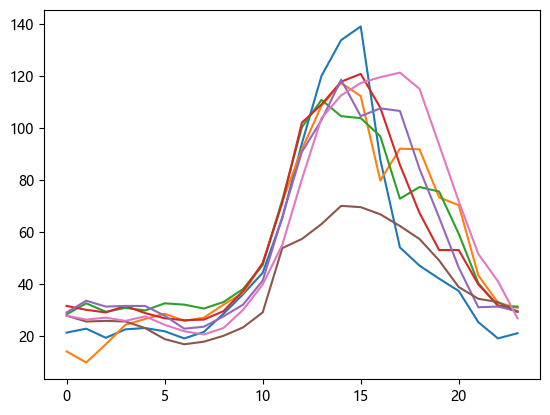

In [54]:
fig = plt.figure()
ax=fig.subplots(1)
t=np.arange(0,24)
for i in range(7):
    ax.plot(t,obs_day[i,:])
plt.show()

In [55]:
# calculate MDA8 from obs
obs_h8=np.empty([14,16])
for i in range(14):
    for j in range(24-8):
        obs_h8[i,j]=np.mean(obs_day[i,j:j+8])
MDA8_obs=np.max(obs_h8,1)


In [110]:
obs_clean=np.mean(MDA8_obs[0:7])
obs_pollute=np.mean(MDA8_obs[7:14])
obs_del=obs_pollute-sim_pollute
obs_con=obs_del/sim_pollute

print('---------------obs-----------------')
print('daily MDA8      = ',MDA8_obs)
print('clean average   = ',obs_clean)
print('pollute average = ',obs_pollute)
print('emission        = ',obs_del)
print('contribution in emssion = ',obs_con)

---------------obs-----------------
daily MDA8      =  [ 92.59375  95.8125   92.6875   97.6875   97.59375  62.46875 107.875
 175.9375  181.65625 219.75    237.5625  218.21875 218.96875 219.6875 ]
clean average   =  92.38839285714286
pollute average =  210.25446428571428
emission        =  -42.71389416285925
contribution in emssion =  -0.16885073858572175


## 绘图

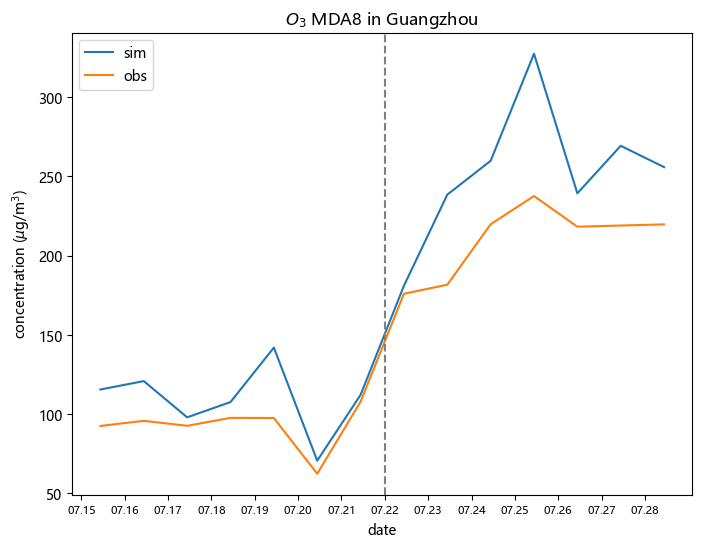

In [106]:
time=np.arange(0.44,14.44,1)

fig=plt.figure(figsize=(8,6),dpi=100)
ax=fig.subplots()
# ax.bar(time,MDA8,label='sim')
# ax.bar(time+0.1,MDA8_obs,label='obs')
ax.plot(time,MDA8,label='sim')
ax.plot(time,MDA8_obs,label='obs')
ax.legend(loc=2)
ax.set_title('$O_3$ MDA8 in Guangzhou')
ax.set_xlabel('date')
ax.set_ylabel('concentration ($\mu$g/m$^3$)')
ax.set_xticks(np.arange(0,14,1))
ax.set_xticklabels(['07.15','07.16','07.17','07.18','07.19','07.20','07.21','07.22','07.23','07.24','07.25','07.26','07.27','07.28'],size=8)
ax.axvline(x=7,color='gray',linestyle='--')
plt.show()

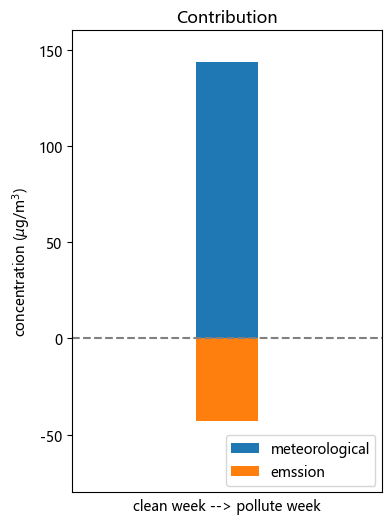

In [108]:
time=np.arange(2,5,4)

fig=plt.figure(figsize=(4,6),dpi=100)
ax=fig.subplots()
ax.bar(time,sim_del,label='meteorological')
ax.bar(time,obs_del,label='emssion')
ax.legend(loc=4)
ax.set_title('Contribution')
ax.set_xlim(0,4)
ax.set_ylim(-80,160)
ax.set_xlabel('clean week --> pollute week')
ax.set_ylabel('concentration ($\mu$g/m$^3$)')
ax.axhline(y=0,color='gray',linestyle='--')
ax.set_xticks([])
plt.show()